# Line plot using Seaborn
* <code>seaborn.lineplot(x=, y=, hue=, data=...)</code>
* [seaborn docs](https://seaborn.pydata.org/generated/seaborn.lineplot.html)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

------------

In [2]:
df=pd.read_csv("data\Compustat_from_1990.csv")[['fyear', 'tic', 'mv', 'sale']] # mv is already in million dollars.
tickers= ['AAPL', 'AMZN', 'MSFT', 'TSLA']
df= df[df.tic.isin(tickers)]
df= df[df.fyear>=2010]
print(df.shape)
df.head()

(44, 4)


,fyear,tic,mv,sale
3535,2010,AAPL,259906.48750,65225.0
3536,2011,AAPL,354351.90564,108249.0
3537,2012,AAPL,626550.35284,156508.0
3538,2013,AAPL,428699.79775,170910.0
3539,2014,AAPL,591015.72075,182795.0


In [3]:
df['lag_sale']= df.groupby('tic')['sale'].shift(1)
df['psr']= df['mv'] / df['lag_sale']
df.head()

,fyear,tic,mv,sale,lag_sale,psr
3535,2010,AAPL,259906.48750,65225.0,NaN,NaN
3536,2011,AAPL,354351.90564,108249.0,65225.0,5.432762
3537,2012,AAPL,626550.35284,156508.0,108249.0,5.788047
3538,2013,AAPL,428699.79775,170910.0,156508.0,2.739156
3539,2014,AAPL,591015.72075,182795.0,170910.0,3.458052


--------------
## Visualization
### PSR ratio of Four companies: Tesla, Aaple, Microsoft, and Amazon

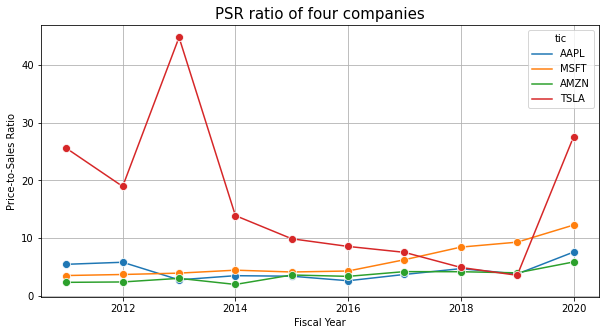

In [4]:
fig, ax= plt.subplots(figsize= (10,5))
ax= sns.lineplot(x=df['fyear'], y=df['psr'], hue= df['tic'],marker= 'o', markersize=8)
ax.set_title("PSR ratio of four companies", fontsize= 15)
ax.set_ylabel('Price-to-Sales Ratio')
ax.set_xlabel('Fiscal Year')
ax.grid()

-------------

### Exclude Tesla to check the other firms better

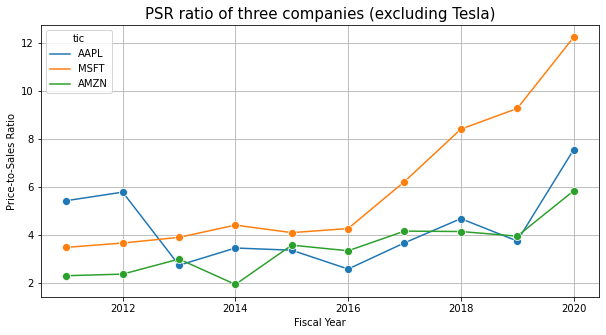

In [5]:
df= df[df.tic!='TSLA']
fig, ax= plt.subplots(figsize= (10,5))
ax= sns.lineplot(x=df['fyear'], y=df['psr'], hue= df['tic'], marker= 'o', markersize=8)
ax.set_title("PSR ratio of three companies (excluding Tesla)", fontsize= 15)
ax.set_ylabel('Price-to-Sales Ratio')
ax.set_xlabel('Fiscal Year')
ax.grid()

-------------

### Remove legend and make graphs more clear

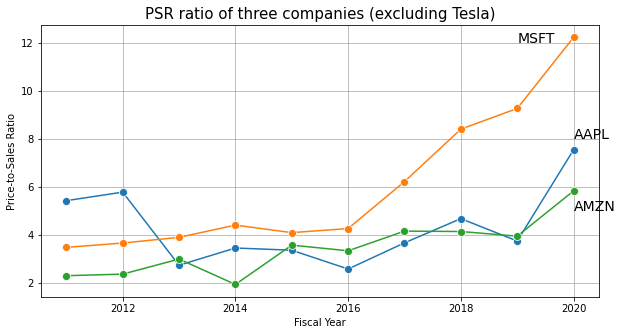

In [6]:
df= df[df.tic!='TSLA']
fig, ax= plt.subplots(figsize= (10,5))
ax= sns.lineplot(x=df['fyear'], y=df['psr'], hue= df['tic'], marker= 'o', markersize=8)
ax.set_title("PSR ratio of three companies (excluding Tesla)", fontsize= 15)
ax.set_ylabel('Price-to-Sales Ratio')
ax.set_xlabel('Fiscal Year')
ax.text(s='MSFT', x= 2019, y= 12, fontsize=14)
ax.text(s='AAPL', x= 2020, y= 8, fontsize=14)
ax.text(s='AMZN', x= 2020, y= 5, fontsize=14)
ax.get_legend().remove()
ax.grid()

-----------